In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Iris.csv')
df=df.drop(columns={'Id'})
labels=list(df['Species'].unique())
Dict=dict(zip(labels,range(len(labels))))
df['Species']=df['Species'].map(Dict)
df['Species']=df['Species'].astype('int')
print(Dict)
df.head()

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X,y=np.array(df.iloc[:,:-1]),np.array(df.iloc[:,-1])
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.18,shuffle=543)
xtrain,xtest=torch.tensor(xtrain,dtype=torch.float32),torch.tensor(xtest,dtype=torch.float32)
ytrain,ytest=torch.tensor(ytrain,dtype=torch.int64),torch.tensor(ytest,dtype=torch.int64)

In [4]:
dataset=TensorDataset(xtrain,ytrain)
dataloader=DataLoader(dataset,batch_size=8,shuffle=True)

In [15]:
import torch
import torch.nn as nn
class AutoEncoder(nn.Module):
    def __init__(self,input_dim=4,encoding_dim=2):
        super().__init__()
        self.encoder=nn.Sequential(nn.Linear(input_dim,2*input_dim),nn.ReLU(),
                                   nn.Linear(2*input_dim,input_dim),nn.ReLU(),
                                   nn.Linear(input_dim,encoding_dim),nn.ReLU())
        self.decoder=nn.Sequential(nn.Linear(encoding_dim,input_dim),nn.ReLU(),
                                   nn.Linear(input_dim,2*input_dim),nn.ReLU(),
                                   nn.Linear(2*input_dim,input_dim))
    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x
    def encode(self,x):
        x=self.encoder(x)
        return x
Model=AutoEncoder()
Lossfunc=nn.MSELoss()
optimizer=optim.Adam(Model.parameters(),lr=0.0001)

In [17]:
def train(epochs):
    for epoch in range(epochs):
        total_loss=0
        for i,(data,y) in enumerate(dataloader):
            res=Model.forward(data)
            loss=Lossfunc(res,data)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss+=loss.item()
        if epoch%2==0:
            print(f"{epoch}:Total_Loss at Epoch {epoch} is:{round(total_loss,5)}")
train(200)

0:Total_Loss at Epoch 0 is:7.26492
2:Total_Loss at Epoch 2 is:7.22547
4:Total_Loss at Epoch 4 is:7.33439
6:Total_Loss at Epoch 6 is:7.06247
8:Total_Loss at Epoch 8 is:7.40291
10:Total_Loss at Epoch 10 is:7.18277
12:Total_Loss at Epoch 12 is:7.25817
14:Total_Loss at Epoch 14 is:7.16624
16:Total_Loss at Epoch 16 is:7.10671
18:Total_Loss at Epoch 18 is:7.19445
20:Total_Loss at Epoch 20 is:7.05419
22:Total_Loss at Epoch 22 is:7.07866
24:Total_Loss at Epoch 24 is:7.15235
26:Total_Loss at Epoch 26 is:7.0959
28:Total_Loss at Epoch 28 is:7.21057
30:Total_Loss at Epoch 30 is:7.35688
32:Total_Loss at Epoch 32 is:6.93425
34:Total_Loss at Epoch 34 is:7.02736
36:Total_Loss at Epoch 36 is:7.11506
38:Total_Loss at Epoch 38 is:7.03984
40:Total_Loss at Epoch 40 is:7.19114
42:Total_Loss at Epoch 42 is:7.04195
44:Total_Loss at Epoch 44 is:7.09604
46:Total_Loss at Epoch 46 is:7.05553
48:Total_Loss at Epoch 48 is:6.89265
50:Total_Loss at Epoch 50 is:7.21017
52:Total_Loss at Epoch 52 is:7.57096
54:Total_Los

In [22]:
def plot(data,keys):
    random_color = (random.random(), random.random(), random.random())
    x,y=data[:,0],data[:,1]
    plt.scatter(y,x,c=random_color,label=keys)
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.title('Visualizing Encoded Data')
    plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


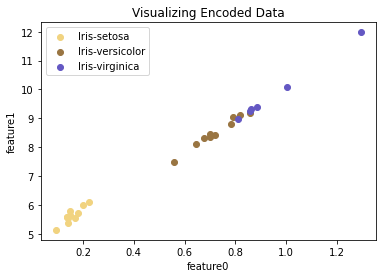

In [25]:
encoded=Model.encode(xtest).detach()
for keys in Dict:
    plot(encoded[ytest==Dict[keys]],keys)

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=8,max_iter=200,random_state=200)
data=Model.encode(xtrain).detach()
kmeans.fit(data)
labels=kmeans.labels_
cluster_centers = kmeans.cluster_centers_

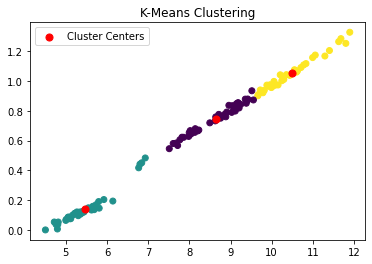

In [37]:
cluster_centers = kmeans.cluster_centers_
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], marker='.', c='red', s=200, label='Cluster Centers')
plt.legend()
plt.title('K-Means Clustering')
plt.show()